In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sms

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df_airline = pd.read_csv('C:/Users/Pravas/Desktop/Data Science Folder/Machine Learning/Time Series/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0, inplace=True, )

In [7]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.set_index('Month',inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

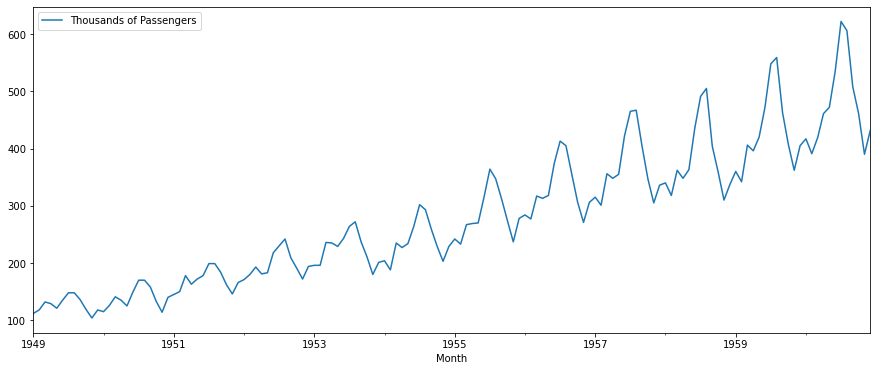

In [13]:
df_airline.plot(figsize = (15,6))

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
## to check whether the data is stationary or not

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics {}:".format(result[0]))
    print("P_Value {}:".format(result[1]))
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics 0.8153688792060411:
P_Value 0.9918802434376409:
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [17]:
df_airline["Passengers first difference"] = df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline["Passengers first difference"].dropna())

ADF Statistics -2.8292668241699945:
P_Value 0.05421329028382621:
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary


In [20]:
df_airline["Passengers second difference"] = df_airline["Passengers first difference"]-df_airline["Passengers first difference"].shift(1)

In [21]:
df_airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [22]:
adf_test(df_airline["Passengers second difference"].dropna())

ADF Statistics -16.384231542468466:
P_Value 2.732891850014397e-29:
Strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and is stationary


In [23]:
### 12 Months
## USe technique differencing
df_airline["Passengers 12 difference"] = df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(12)

In [24]:
df_airline.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [25]:
adf_test(df_airline["Passengers 12 difference"].dropna())

ADF Statistics -3.3830207264924814:
P_Value 0.011551493085514952:
Strong evidence against the null hypothesis, reject the null hypothesis, Data has no unit root and is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

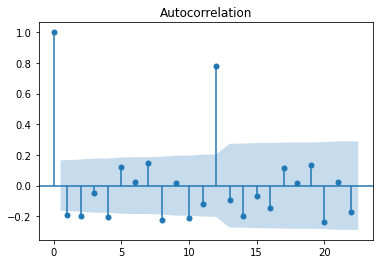

In [27]:
acf = plot_acf(df_airline["Passengers second difference"].dropna())

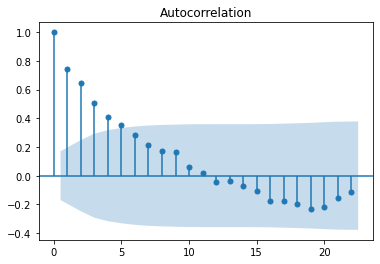

In [28]:
acf_12 = plot_acf(df_airline["Passengers 12 difference"].dropna())

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


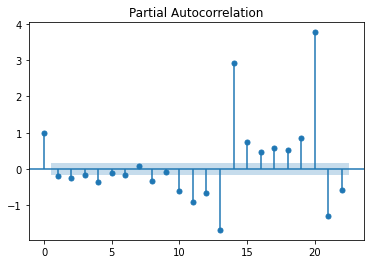

In [29]:
pacf = plot_pacf(df_airline["Passengers second difference"].dropna())

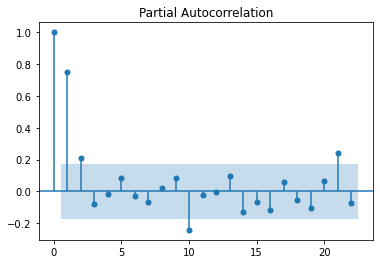

In [34]:
pacf_12 = plot_pacf(df_airline["Passengers 12 difference"].dropna())

In [31]:
df_airline

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [32]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [35]:
train_data=df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days =1):test_dataset_end]

In [36]:
## Prediction
pred_start_data = test_data.index[0]
pred_end_date = test_data.index[-1]

In [37]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [38]:
## Create ARIMA Model

In [54]:
model_arima = ARIMA(train_data['Thousands of Passengers'], order=(0,2,0))

<IPython.core.display.Javascript object>

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [55]:
model_arima_fit = model_arima.fit()

In [56]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Mon, 30 Jan 2023   AIC                            775.563
Time:                                13:17:18   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [57]:
pred = model_arima_fit.predict(start = pred_start_data, end = pred_end_date)
residuals = test_data["Thousands of Passengers"] - pred

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [58]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

<AxesSubplot:ylabel='Density'>

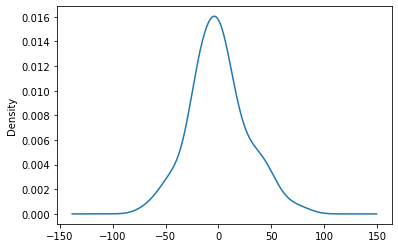

In [59]:
model_arima_fit.resid.plot(kind = 'kde')

In [60]:
test_data["Predicted ARIMA"] = pred

C:\Users\Pravas\AppData\Local\Temp/ipykernel_12440/534601490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted ARIMA"] = pred


In [61]:
test_data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference,Predicted ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,0.426829
1956-02-01,277.0,-7.0,-13.0,44.0,0.426829
1956-03-01,317.0,40.0,47.0,50.0,0.426829
1956-04-01,313.0,-4.0,-44.0,44.0,0.426829
1956-05-01,318.0,5.0,9.0,48.0,0.426829


<AxesSubplot:xlabel='Month'>

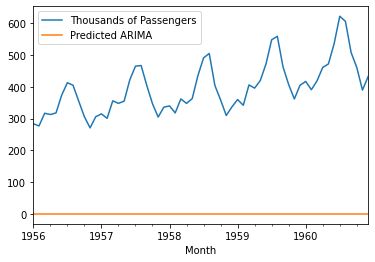

In [62]:
test_data[['Thousands of Passengers', 'Predicted ARIMA']].plot()

In [63]:
## Create a SARIMA Model

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
model_SARIMA = SARIMAX(train_data['Thousands of Passengers'], order = (3,0,3), seasonal_order=(0,1,0,12))

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [65]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [66]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 3)x(0, 1, [], 12)   Log Likelihood                -266.398
Date:                             Mon, 30 Jan 2023   AIC                            546.795
Time:                                     13:22:24   BIC                            562.732
Sample:                                 01-01-1949   HQIC                           553.140
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.437      2.284      0.022       0.142       1.856
ar.L2         -0.3200      0.609     -0.525      0.599      -1.514       0.874
ar.L3          0.2993      0.403      0.742      0.458      -0.491       1.090
ma.L1         -0.2563      0.440     -0.582      0.561      -1.120       0.607
ma.L2          0.3592      0.364      0.987      0.323      -0.354       1.072
ma.L3         -0.3338      0.164     -2.029      0.042      -0.656      -0.011
sigma2        92.2759     17.594      5.245      0.000      57.793     126.759
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.79   Prob(JB):                         0.33
Heteroskedasticity (H):               2.07   Skew:                             0.42
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_sarima = model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))

C:\Users\Pravas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [68]:
test_data['Predicted SARIMA'] = pred_sarima

C:\Users\Pravas\AppData\Local\Temp/ipykernel_12440/4164437643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted SARIMA'] = pred_sarima


<AxesSubplot:xlabel='Month'>

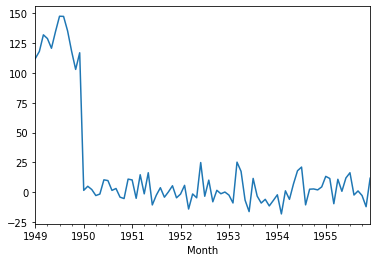

In [69]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

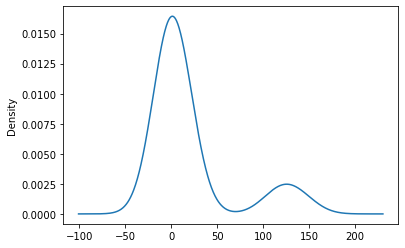

In [70]:
model_SARIMA_fit.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

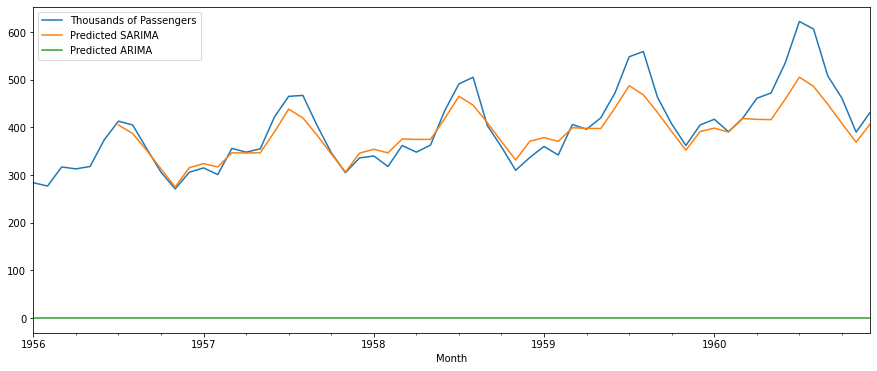

In [73]:
test_data[['Thousands of Passengers','Predicted SARIMA','Predicted ARIMA']].plot(figsize = (15,6))